In [1]:
from __future__ import absolute_import , division , print_function, unicode_literals
import os

# Importamos TF2 Y Keras
import tensorflow as tf
from tensorflow import keras

# Datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

# Para cargar imagenes desde internet
from PIL import Image
import requests
from io import BytesIO


# Reescalar Imagen 
import cv2

### ___Dataset MNIST FASHION___
---
>* Dividimos y cargamos teniendo en cuenta datos y etiquetad de los dataset de entrenamiento y de testeo respectivamente


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

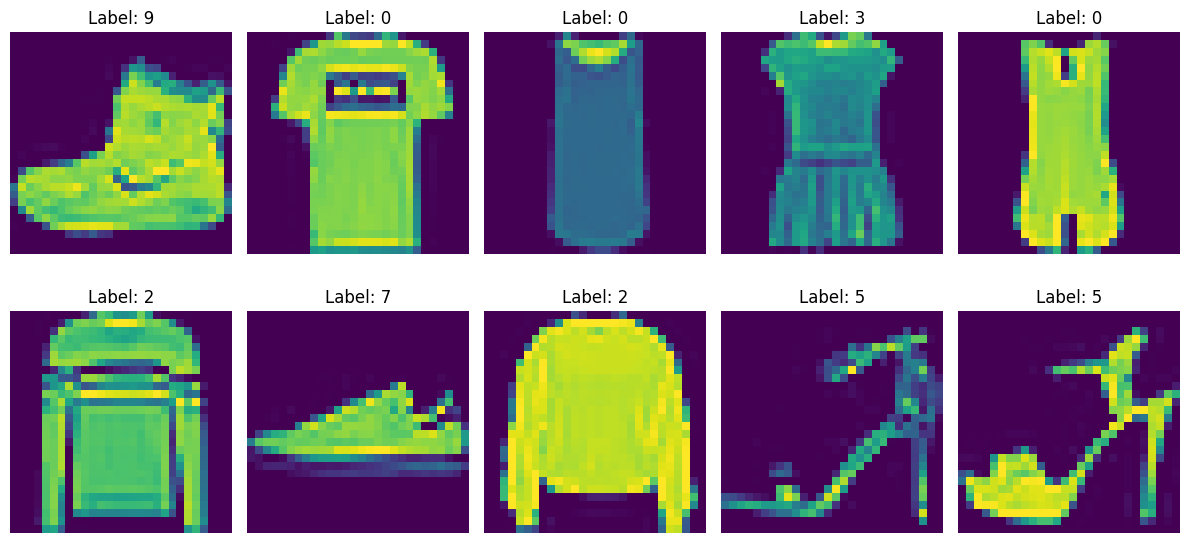

In [3]:
# Crear una figura con un tamaño adecuado
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterar sobre las primeras 10 imágenes
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])  # Ajusta el mapa de colores si es necesario
    ax.set_title(f"Label: {train_labels[i]}")  # Muestra la etiqueta si está disponible
    ax.axis("off")  # Oculta los ejes

# Ajustar el layout para mejor visualización
plt.tight_layout()
plt.show()

>* Las etiquetas en este dataset van del 0 al 9 . Estas corresponden a la clase de vestimenta que representa en la imagen: 

In [4]:
class_names = ['Camiseta','Pantalon','Sueter','Vestido','Abrigo',
               'Sandalia','Camisa','Zapatilla-deportiva','Bolso','Botines']

### ___Exploracion de datos___
---

In [5]:
train_images[0].shape # Verificamos tamaño por imagen

(28, 28)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### ___Pre-Procesmiento de Dataset___
---

In [11]:
train_images = train_images/255 # Rango de valores de 0 a 1 
test_images = test_images/255

In [12]:
print(set(train_labels))  # Ver los valores únicos en train_labels
print(len(class_names))   # Ver la cantidad de clases

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}
10


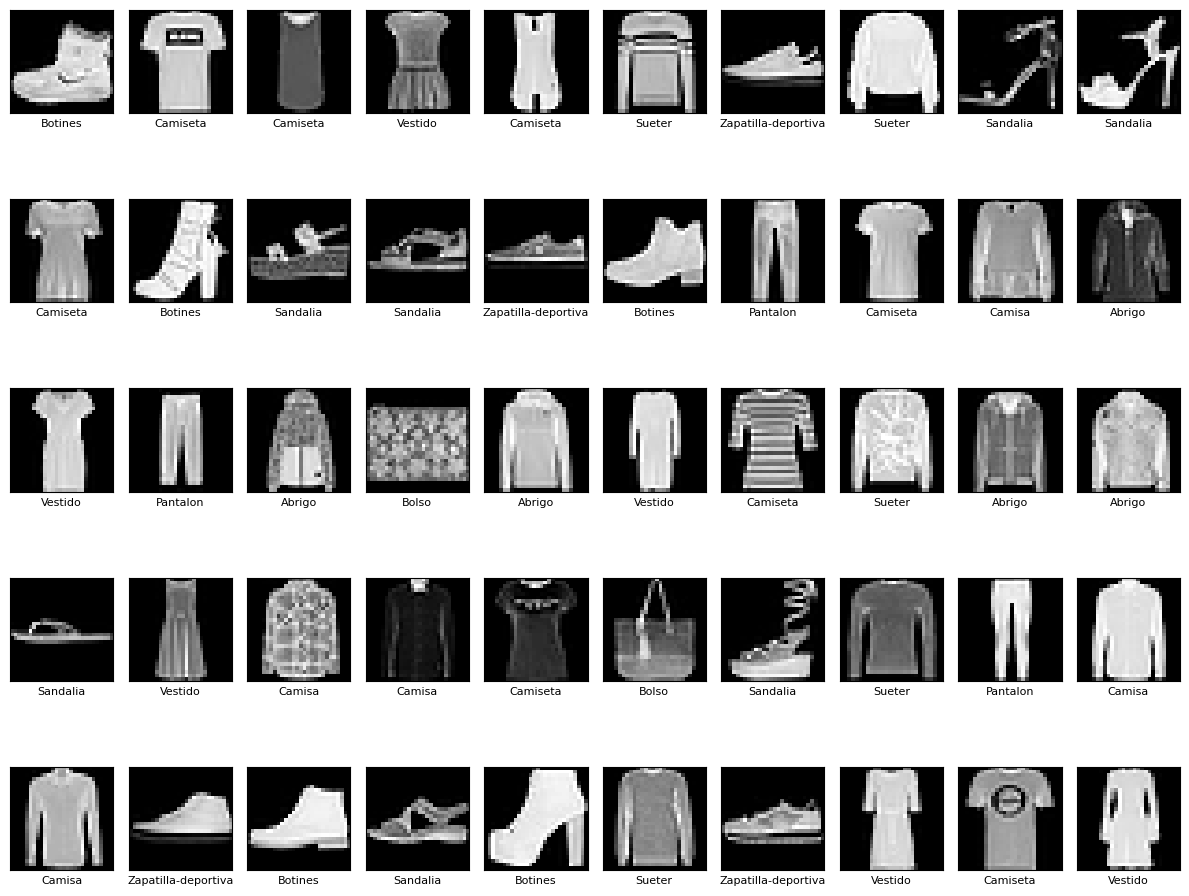

In [13]:
# Verificar que class_names tiene suficientes etiquetas
num_classes = len(class_names)  

# Crear una figura con tamaño adecuado
plt.figure(figsize=(12, 10))

# Iterar sobre las primeras 50 imágenes (o menos si hay menos imágenes disponibles)
num_images = min(50, len(train_images))

for i in range(num_images):
    plt.subplot(5, 10, i + 1)  # Organiza en 5 filas x 10 columnas
    plt.xticks([])  # Oculta los ejes X
    plt.yticks([])  # Oculta los ejes Y
    plt.grid(False)  # Desactiva la cuadrícula
    plt.imshow(train_images[i], cmap='gray')  # Usa 'gray' para imágenes en escala de grises

    # Evitar IndexError en class_names
    label_index = train_labels[i]
    if 0 <= label_index < num_classes:
        plt.xlabel(class_names[label_index], fontsize=8)  
    else:
        plt.xlabel("Unknown", fontsize=8)  # Manejo de valores fuera de rango

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

### ___Configuracion de la Red Neuronal___
---
>* Necesitamos una neurona por cada pixel de la imagen (784) neuronas en este caso
>* En una capa interna o intermedia vamos a empezar con 15 capas
>* A la salida utilizaremos 10 neuronas 1 por cada tipo de prenda ( vamos a ver la densidad de interconexion entre todas las neuronas)
>* Cada interconexion tiene un peso ( revision algoritmo de perceptron)

<br><br>
## Configuramos la red neuronal
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)) ,# Creacion de capa plana (capa de entrada)
    keras.layers.Dense(120, activation='relu'), # Capa intermedia con densidad 15 y metodo de activacion preferencial para imagenes relu
    keras.layers.Dense(10 , activation='softmax') # Capa de salida densamente conectada con la intermedia metodo de activacion softmax
])

/Users/danielapinzon/Downloads/Udemy/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary() # Resumen de la configuracion de la red neuronal

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,410 (372.70 KB)

 Trainable params: 95,410 (372.70 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compilamos el modelo( indicacion de comportamiento en la etapa de entrenamiento)
# Optimizador adam = mejoras en el gradiente estocastico - Criterios especificos para saltos - Convergencia para minimizar error
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', # Metodo de error para clasificaciones - One Hot  ( Tarject con entero para representar la categoria)
              metrics=['accuracy'] # Como vamos a medir las metricas
              )

>* Entrenamiento del modelo

In [41]:
checkpoint_path = "checkpoints/check.weights.h5"
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_weights_only=True, verbose=1
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir , histogram_freq=1)

model.fit(train_images, 
          train_labels, 
          epochs=50,
          validation_data = (test_images , test_labels), 
          callbacks=[cp_callbacks , tensorboard_callback])

# luego ejecuar en terminal 
# tensorboard --logdir logs/fit

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9637 - loss: 0.0962
Epoch 1: saving model to checkpoints/check.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9637 - loss: 0.0963 - val_accuracy: 0.8860 - val_loss: 0.4966
Epoch 2/50
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9642 - loss: 0.0938
Epoch 2: saving model to checkpoints/check.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.0938 - val_accuracy: 0.8859 - val_loss: 0.5220
Epoch 3/50
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9641 - loss: 0.0957
Epoch 3: saving model to checkpoints/check.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.0957 - val_accuracy: 0.8866 - val_loss: 0.5193
Epoch 4/50
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9639 - loss: 0.0940
Epoch 4: saving model to checkpoints/check.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9639 - loss: 0.094

In [18]:
test_loss , test_acc = model.evaluate(test_images,test_labels)
print("Presicion : " , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8906 - loss: 0.5060
Presicion :  0.8884999752044678


### ___Predicciones___
---

In [19]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


In [20]:
predictions[0]

array([6.9633479e-20, 5.5395310e-13, 7.0464867e-25, 1.9346246e-21,
       3.0381422e-27, 6.7027284e-10, 7.9564931e-19, 1.4796613e-05,
       7.3038899e-16, 9.9998522e-01], dtype=float32)

In [21]:
np.argmax(predictions[0]) # Valor de mayo confianza

np.int64(9)

>* Probamos el modelo con una imagen externa del dataset

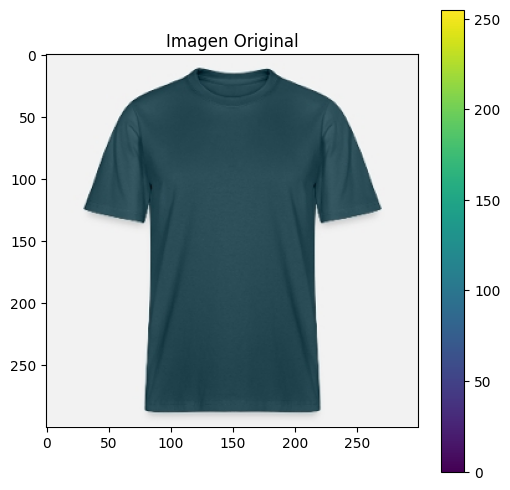

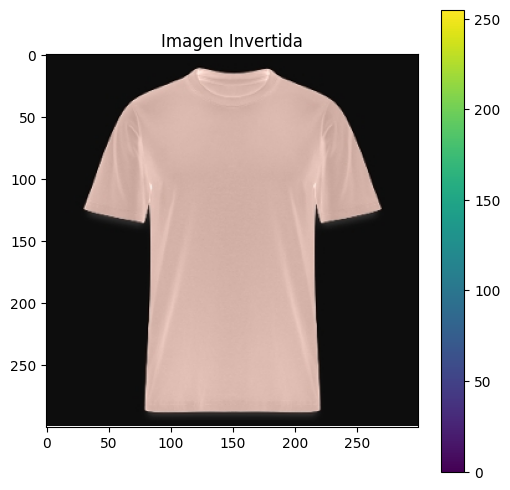

In [22]:
# URL de la imagen
url = "https://image.spreadshirtmedia.net/image-server/v1/productTypes/2095/views/1/appearances/1189,width=300,height=300,backgroundColor=f2f2f2.jpg"

# Encabezados HTTP simulando un navegador real
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Hacer la solicitud HTTP con headers
response = requests.get(url, headers=headers)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    try:
        # Intentar abrir la imagen
        img = Image.open(BytesIO(response.content))
        np_img = np.array(img)

        # Mostrar la imagen original
        plt.figure(figsize=(6, 6))
        plt.imshow(np_img)
        plt.colorbar()
        plt.grid(False)
        plt.title("Imagen Original")
        plt.show()

        # Invertir la imagen
        np_img = 255 - np_img

        # Mostrar la imagen invertida
        plt.figure(figsize=(6, 6))
        plt.imshow(np_img)
        plt.colorbar()
        plt.grid(False)
        plt.title("Imagen Invertida")
        plt.show()
    
    except Exception as e:
        print(f"Error al abrir la imagen: {e}")
else:
    print(f"Error al descargar la imagen. Código de estado: {response.status_code}")

In [23]:
np_img.shape

(300, 300, 3)

In [24]:
# observamos que la imagen importada tiene 3 dimensiones, 
# porque es a color.
# por eso declaramos esta función para convertir la imagen a color a escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [25]:
bw_image = rgb2gray(np_img)

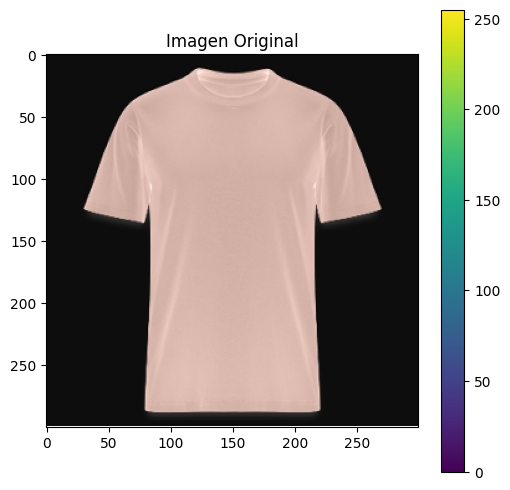

In [26]:
# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.title("Imagen Original")
plt.show()

In [27]:
bw_image.shape

(300, 300)

In [28]:
#ahora a la imagen en blanco y negro debemos redimensionarla a 28x28
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

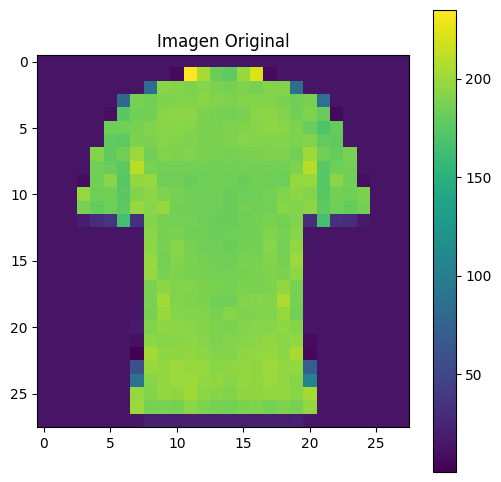

In [29]:
# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.title("Imagen Original")
plt.show()

In [30]:
res = res/255

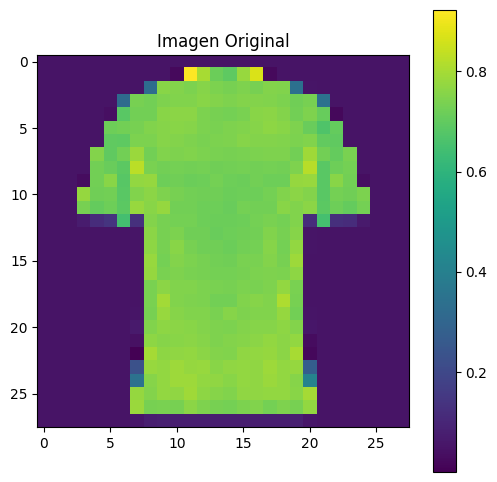

In [31]:
# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.title("Imagen Original")
plt.show()

In [32]:
x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [33]:
x[0] = np.array(res)

In [34]:
predictions = model.predict(x)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[7.5937051e-01, 3.8301585e-15, 1.5634512e-04, 1.0570717e-05,
        1.0607182e-05, 3.5167862e-17, 2.4045205e-01, 1.4381105e-15,
        1.8862110e-08, 3.8738814e-11]], dtype=float32)

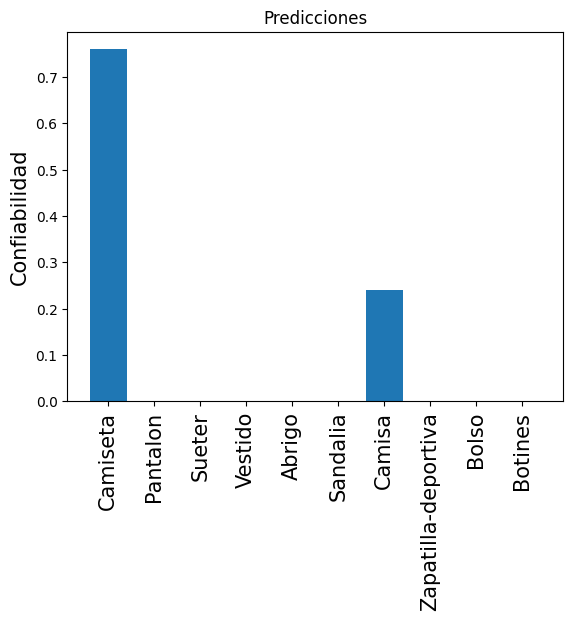

In [35]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

### ___Modelo 2___
---

In [36]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

/Users/danielapinzon/Downloads/Udemy/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Compilamos el modelo( indicacion de comportamiento en la etapa de entrenamiento)
# Optimizador adam = mejoras en el gradiente estocastico - Criterios especificos para saltos - Convergencia para minimizar error
model2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', # Metodo de error para clasificaciones - One Hot  ( Tarject con entero para representar la categoria)
              metrics=['accuracy'] # Como vamos a medir las metricas
              )

In [38]:
loss , acc = model2.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.1275 - loss: 2.4569


In [39]:
acc

0.1265999972820282

>* Cargamos los pesos grabados y lo intentamos nuevamente

In [40]:
model2.load_weights(checkpoint_path)
loss , acc = model2.evaluate(test_images,test_labels)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8906 - loss: 0.5060


/Users/danielapinzon/Downloads/Udemy/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


0.8884999752044678